#Import Packages

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Load Data

In [177]:
df = pd.read_csv('IT_customer_churn.csv')
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4951,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.30,2357.75,No
6119,Female,0,No,No,14,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Credit card (automatic),51.45,727.85,No
6892,Female,0,Yes,Yes,48,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),99.70,4977.2,No
5998,Male,0,Yes,No,48,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.05,1036,No


#EDA

In [178]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [179]:
df.shape

(7043, 20)

In [180]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [182]:
# Convert type of TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [184]:
# Missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [185]:
#Remove the missing values
df = df.dropna()

In [186]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [188]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [189]:
#unique values for object features
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in cols:
  print(col, ":", df[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [190]:
#What percent of Customers have differnet features?
print(round((len(df[df.PhoneService == 'Yes'].index)/len(df.index))*100), "% of customers have PhoneService")
print(round((len(df[df.MultipleLines == 'Yes'].index)/len(df.index))*100), "% of customers have MultipleLines")
print(round((len(df[df.OnlineSecurity == 'Yes'].index)/len(df.index))*100), "% of customers have OnlineSecurity")
print(round((len(df[df.OnlineBackup == 'Yes'].index)/len(df.index))*100), "% of customers have OnlineBackup")
print(round((len(df[df.DeviceProtection == 'Yes'].index)/len(df.index))*100), "% of customers have DeviceProtection")
print(round((len(df[df.TechSupport == 'Yes'].index)/len(df.index))*100), "% of customers have TechSupport")
print(round((len(df[df.StreamingTV == 'Yes'].index)/len(df.index))*100), "% of customers have StreamingTV")
print(round((len(df[df.StreamingMovies == 'Yes'].index)/len(df.index))*100), "% of customers have StreamingMovies")

90 % of customers have PhoneService
42 % of customers have MultipleLines
29 % of customers have OnlineSecurity
34 % of customers have OnlineBackup
34 % of customers have DeviceProtection
29 % of customers have TechSupport
38 % of customers have StreamingTV
39 % of customers have StreamingMovies


In [191]:
pd.crosstab(df.gender, df.Churn, normalize=True)*100

Churn,No,Yes
gender,,
Female,36.177474,13.353242
Male,37.244027,13.225256


#Visualization

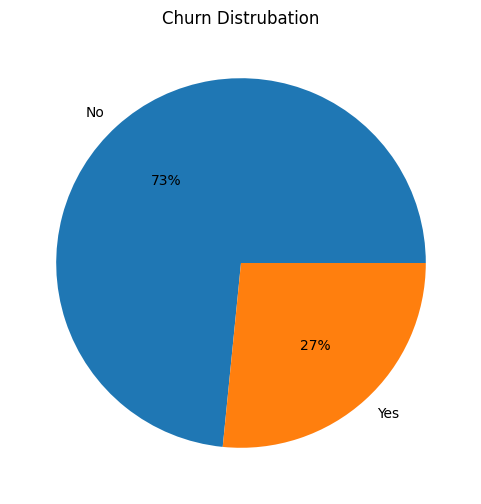

In [192]:
#distubation of Churn (for check balancing or imbalancing data)
plt.figure(figsize=(6,6))
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index, autopct='%.0f%%')
plt.title('Churn Distrubation')
plt.show()

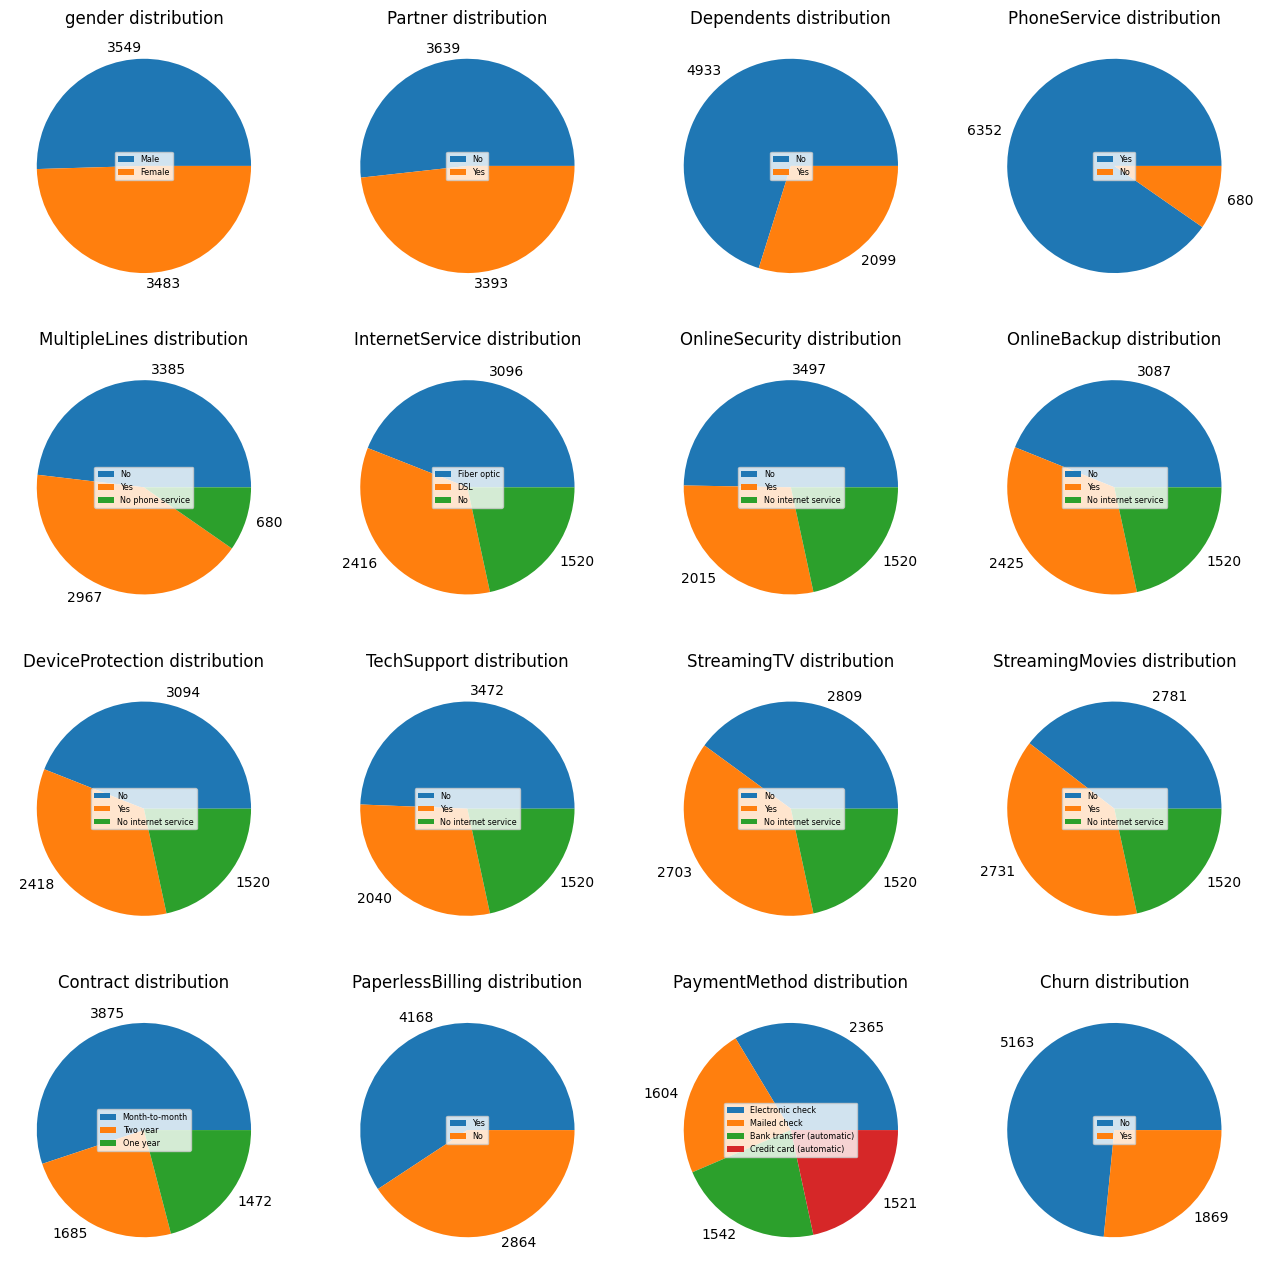

In [193]:
fig, ax = plt.subplots(4,4, figsize=(16,16))
c = 0
for i in range(4):
    for j in range(4):
        data = df[cols[c]].value_counts()
        ax[i,j].pie(data, labels=data.values)
        ax[i,j].legend(labels=data.index, loc='center', fontsize='xx-small')
        ax[i,j].set_title('{} distribution'.format(cols[c]))
        c += 1

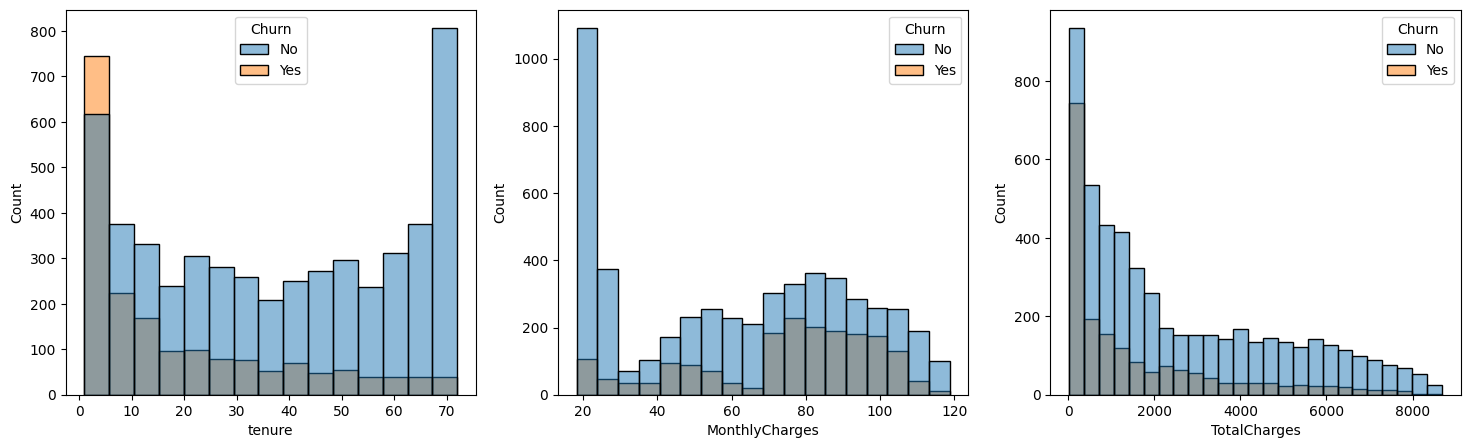

In [194]:
fig, axes = plt.subplots(ncols=3, figsize=(18,5))
sns.histplot(data=df, x="tenure", hue="Churn", ax=axes[0])
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", ax=axes[1])
sns.histplot(data=df, x="TotalCharges", hue="Churn", ax=axes[2])
plt.show()

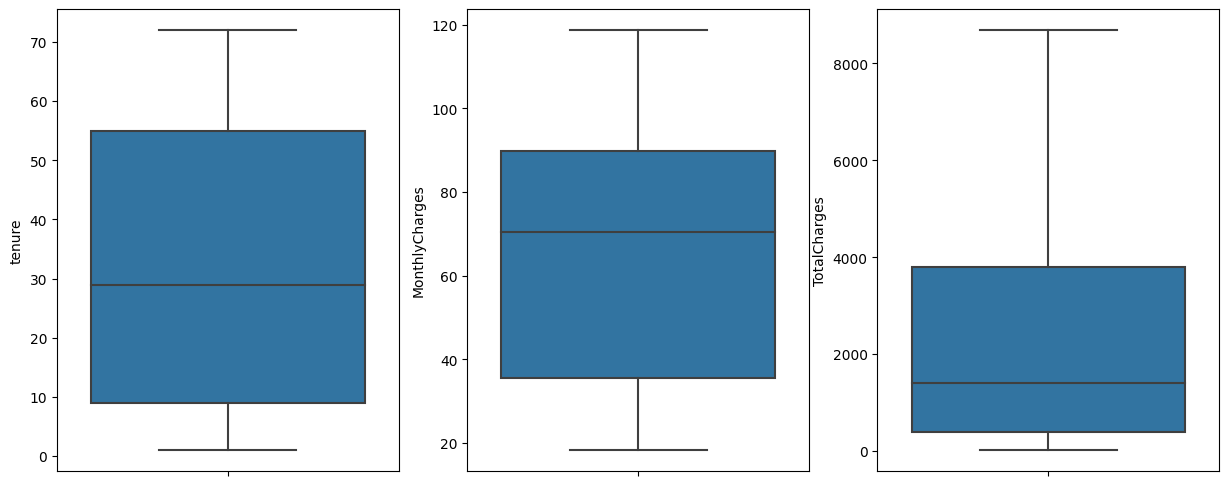

In [195]:
fig, axes = plt.subplots(ncols=3,figsize = (15,6))

sns.boxplot(y = df['tenure'], ax=axes[0])

sns.boxplot(y = df['MonthlyCharges'], ax=axes[1])

sns.boxplot(y = df['TotalCharges'], ax=axes[2])
plt.show()

#Preprocessing

In [196]:
#Convert object features to numeric features
cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling', 'Churn']
df = df.replace("No internet service","No")
df = df.replace("No phone service","No",)
for col in cols:
  df[col] = df[col].replace({"No":0, "Yes":1})

df['gender'] = df['gender'].replace({"Female":0, "Male":1})

In [197]:
df['Contract'] = df['Contract'].replace({'Month-to-month':0, 'One year':1, 'Two year':2})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,
 'Credit card (automatic)':3})
df['InternetService'] = df['InternetService'].replace({'DSL':0, 'Fiber optic':1, 'No':2})

In [198]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1


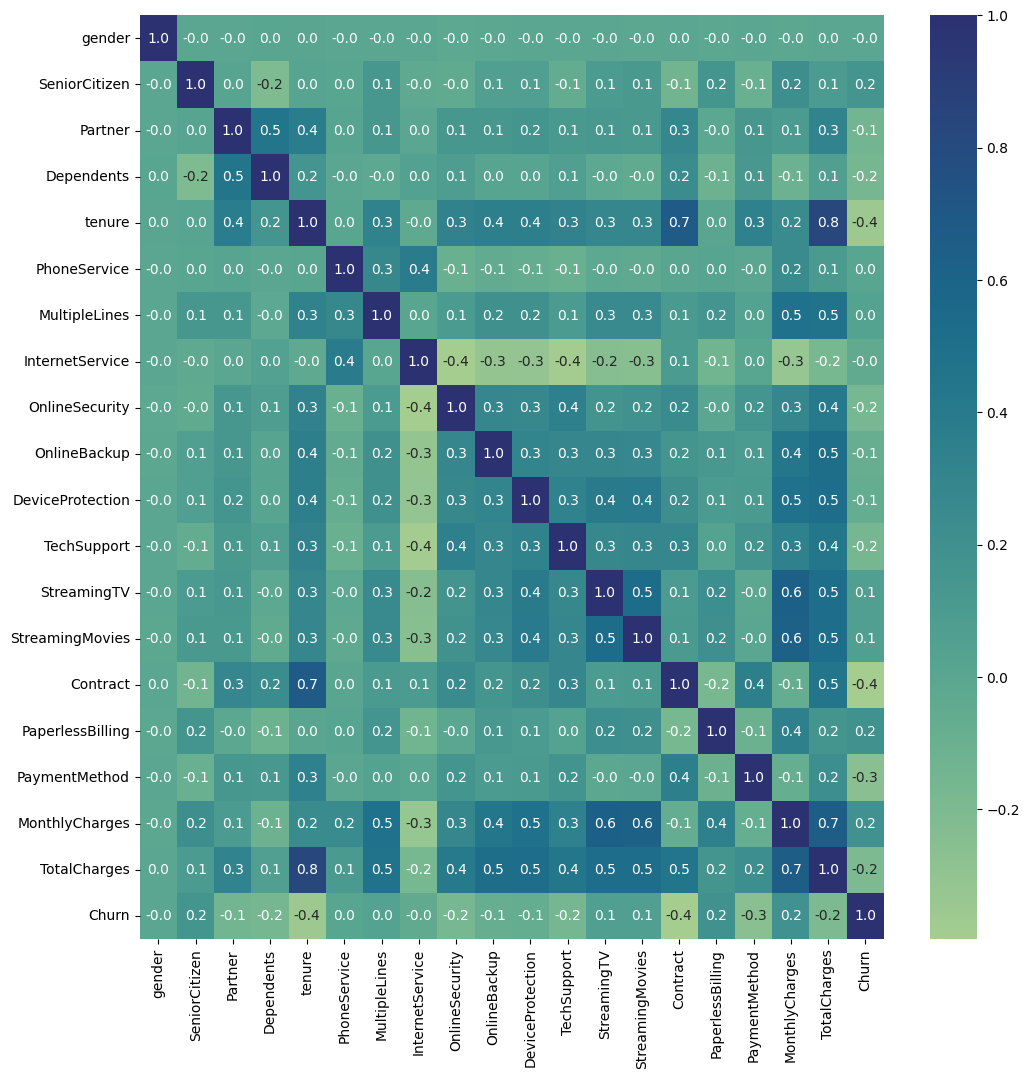

In [199]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='crest', fmt='.1f', annot=True)
plt.show()

In [200]:
#Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

#Model Building

In [201]:
#First: balancing in data by SMOTE
X = df.drop('Churn',axis=1)
y = df['Churn']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [203]:
models = {
    'Logostic': LogisticRegression(),
    'Forest': RandomForestClassifier(),
    'Svc': SVC(),
    'XGBC': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradianBoost': GradientBoostingClassifier(),
    'ExTree': ExtraTreesClassifier()}
models_name = [ 'Logostic',
    'Forest',
    'Svc',
    'XGBC',
    'AdaBoost',
    'GradianBoost',
    'ExTree']
accuracy = []
recall = []
roc_score = []
f_score = []

In [204]:
for key, value in models.items():
  model = models[key]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
  recall.append(recall_score(y_test, y_pred))
  roc_score.append(roc_auc_score(y_test, y_pred))
  f_score.append(f1_score(y_test, y_pred))

In [205]:
mydf = pd.DataFrame({'Name Of Models': models_name, 'Accuaracy': accuracy, 'Recall': recall, 'RocScore': roc_score, 'F1_Score': f_score})
mydf.sort_values(by=['F1_Score'], ascending=False)

,Name Of Models,Accuaracy,Recall,RocScore,F1_Score
6,ExTree,0.836399,0.854792,0.836399,0.839354
1,Forest,0.831559,0.860600,0.831559,0.836312
3,XGBC,0.821878,0.851888,0.821878,0.827068
5,GradianBoost,0.799129,0.857696,0.799129,0.810242
4,AdaBoost,0.789932,0.867377,0.789932,0.805031
2,Svc,0.791868,0.827686,0.791868,0.799065
0,Logostic,0.782672,0.831559,0.782672,0.792801


In [206]:
def confusion(Model_Name):
  model = Model_Name
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  confusion_matrix_ = confusion_matrix(y_test, predicted)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
  cm_display.plot()
  plt.show()

.......confusion matrix for logistic regression.......


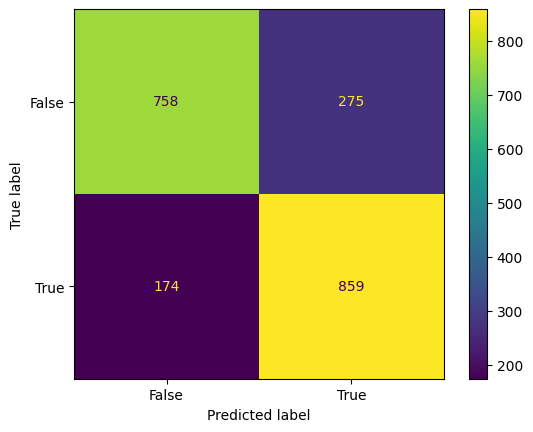

In [207]:
print(".......confusion matrix for logistic regression.......")
confusion(LogisticRegression())

.......confusion matrix for random forest classifier.......


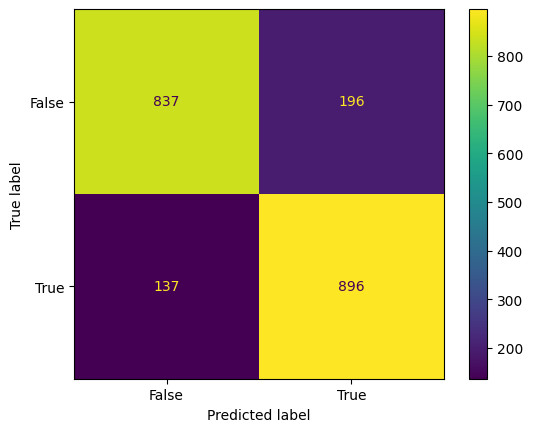

In [208]:
print(".......confusion matrix for random forest classifier.......")
confusion(RandomForestClassifier())

.......confusion matrix for svc.......


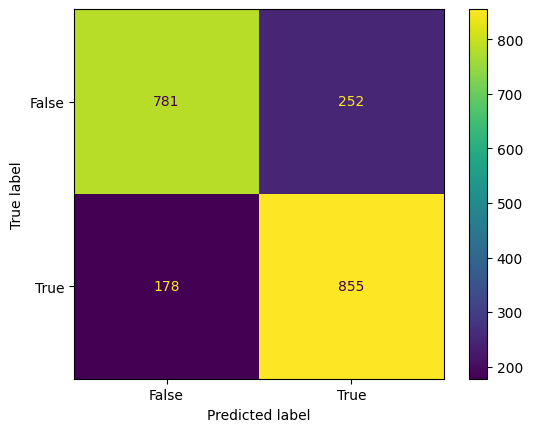

In [209]:
print(".......confusion matrix for svc.......")
confusion(SVC())

.......confusion matrix for xgbc classifier.......


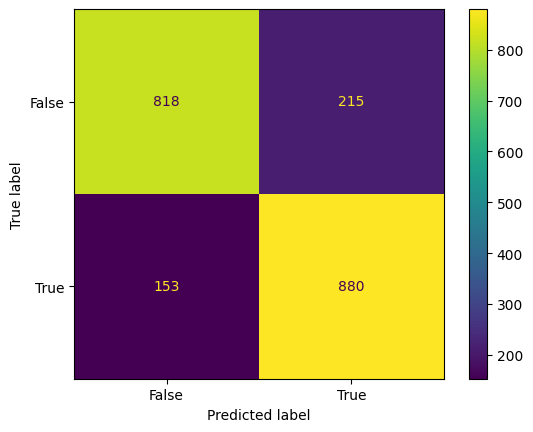

In [210]:
print(".......confusion matrix for xgbc classifier.......")
confusion(XGBClassifier())

.......confusion matrix for AdaBoost Classifier.......


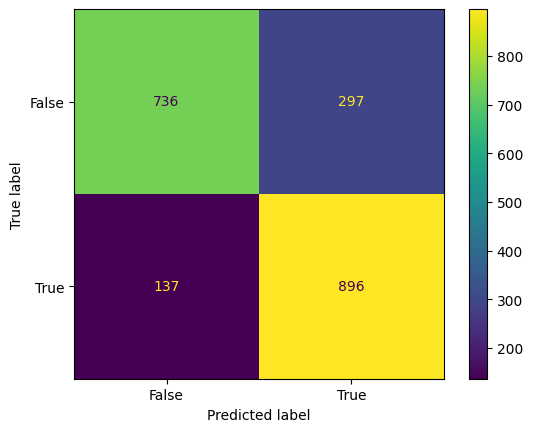

In [211]:
print(".......confusion matrix for AdaBoost Classifier.......")
confusion(AdaBoostClassifier())

.......confusion matrix for GradientBoostingClassifier.......


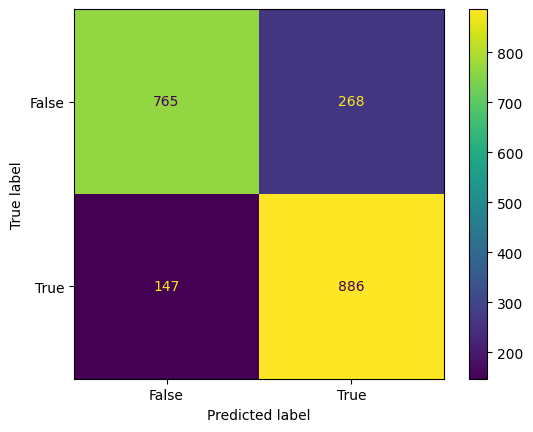

In [212]:
print(".......confusion matrix for GradientBoostingClassifier.......")
confusion(GradientBoostingClassifier())

.......confusion matrix for ExtraTreesClassifier.......


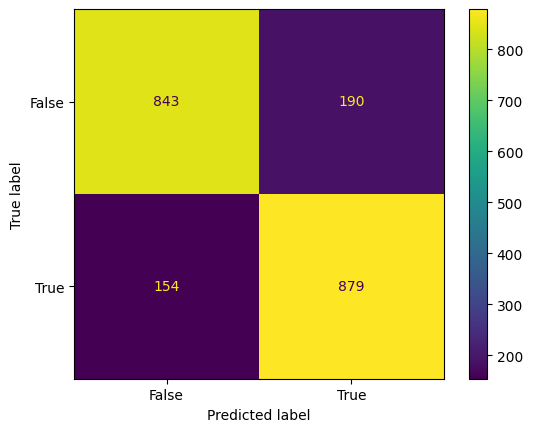

In [213]:
print(".......confusion matrix for ExtraTreesClassifier.......")
confusion(ExtraTreesClassifier())

#Save Model

In [214]:
final_model = RandomForestClassifier()
final_model.fit(X_train,y_train)

RandomForestClassifier()

In [215]:
import joblib

In [216]:
joblib.dump(final_model, "final_model.sav")

['final_model.sav']